# Complete Regression - Lab

## Introduction
By now, you have created all the necessary functions to calculate the slope, intercept, best-fit line, prediction, and visualizations. In this lab you will put them all together to run a regression experiment and calculate the model loss. 

## Objectives

You will be able to:

* Perform a linear regression using self-constructed functions
* Calculate the coefficient of determination using self-constructed functions
* Use the coefficient of determination to determine model performance

## The formulas

**Slope**: 
$\hat m = \dfrac{\overline{x}*\overline{y}-\overline{xy}}{(\overline{x})^2-\overline{x^2}}$


**Intercept**: $ \hat c = \bar{y} - \hat m\bar{x}$

**Prediction**: $\hat{y} = \hat mx + \hat c$

**R-Squared**: 
$ R^2 = 1- \dfrac{SS_{RES}}{SS_{TOT}} = 1 - \dfrac{\sum_i(y_i - \hat y_i)^2}{\sum_i(y_i - \overline y_i)^2} $


Use the Python functions created earlier to implement these formulas to run a regression analysis using x and y as input variables. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

In [2]:
# Combine all the functions created so far to run a complete regression experiment. 
# Produce an output similar to the one shown below. 

X = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], dtype=np.float64)
Y = np.array([7, 7, 8, 9, 9, 10, 10, 11, 11, 12], dtype=np.float64)


In [3]:
def slope(xs, ys):
    return round(((xs.mean()*ys.mean()-((xs*ys).mean())) / (xs.mean()**2-((xs**2).mean()))), 2)
def intercept(xs, ys):
    m = slope(xs, ys)
    return round((ys.mean()-(m*xs.mean())), 2)
def exp_y(xs, ys, exp_x):
    m = slope(xs, ys)
    c = intercept(xs, ys)
    return m*exp_x+c
def r_sq(xs, ys):
    real_y = ys
    exp = exp_y(xs, ys, xs)
    ss_res = ((real_y-exp)**2).sum()
    ss_tot = ((real_y-real_y.mean())**2).sum()
    return round(1-(ss_res/ss_tot),2)

Basic Regression Diagnostics
----------------------------
Slope: 0.56
Y-Intrcept: 6.32
R-Squared: 0.97
----------------------------
Model: Y = 0.56 * X + 6.32


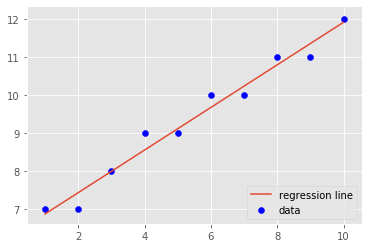

In [4]:
print ('Basic Regression Diagnostics')
print ('----------------------------')
print ('Slope: {}'.format(slope(X, Y)))
print ('Y-Intrcept: {}'.format(intercept(X, Y)))
print ('R-Squared: {}'.format(r_sq(X, Y)))
print ('----------------------------')
print ('Model: Y = {} * X + {}'.format(slope(X, Y), intercept(X, Y)))
plt.plot(X, exp_y(X, Y, X), label='regression line')
plt.scatter(X, Y, c='blue', label='data')
plt.legend(loc=4)
plt.show()

In [5]:
# Basic Regression Diagnostics
# ----------------------------
# Slope: 0.56
# Y-Intercept: 6.33
# R-Squared: 0.97
# ----------------------------
# Model: Y = 0.56 * X + 6.33

## Make Predictions

Predict and plot the value of y using regression line above for a new value of $x = 4.5$.

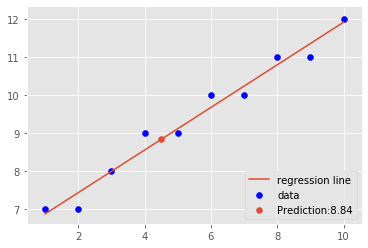

In [6]:
# Make prediction for x = 4.5 and visualize on the scatter plot
plt.plot(X, exp_y(X, Y, X), label='regression line')
plt.scatter(X, Y, c='blue', label='data')
plt.scatter(x=4.5, y=exp_y(X, Y, 4.5), label='Prediction:{}'.format(exp_y(X, Y, 4.5)))
plt.legend(loc=4)
plt.show()

## Level up - Optional 
Load the "`heightweight.csv`" dataset. Use the height as an independent and weight as a dependent variable and draw a regression line to data using your code above. Calculate your R-Squared value for the model and try to predict new values of y. 

## Summary

In this lab, we ran a complete simple regression analysis experiment using functions created so far. Next up, you'll learn how you can use Python's built-in modules to perform similar analyses with a much higher level of sophistication. 

In [7]:
df = pd.read_csv('heightweight.csv')
df.head()

,height,weight
0,68,165
1,71,201
2,61,140
3,69,170
4,71,192


In [8]:
df.isna().sum()

height    0
weight    0
dtype: int64

In [9]:
print ('Basic Regression Diagnostics')
print ('----------------------------')
print ('Slope: {}'.format(slope(df['height'], df['weight'])))
print ('Y-Intrcept: {}'.format(intercept(df['height'], df['weight'])))
print ('R-Squared: {}'.format(r_sq(df['height'], df['weight'])))
print ('----------------------------')
print ('Model: Y = {} * X + {}'.format(slope(df['height'], df['weight']), intercept(df['height'], df['weight'])))

Basic Regression Diagnostics
----------------------------
Slope: 5.54
Y-Intrcept: -204.55
R-Squared: 0.96
----------------------------
Model: Y = 5.54 * X + -204.55


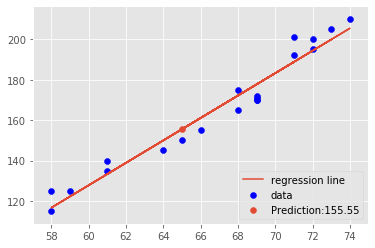

In [10]:
# Make prediction for x = 65 and visualize on the scatter plot
plt.plot(df['height'], exp_y(df['height'], df['weight'], df['height']), label='regression line')
plt.scatter(df['height'], df['weight'], c='blue', label='data')
plt.scatter(x=65, 
            y=exp_y(df['height'], df['weight'], 65), 
            label='Prediction:{}'.format(round(exp_y(df['height'], df['weight'], 65), 2)))
plt.legend(loc=4)
plt.show()